In [2]:
import pandas as pd
import numpy as np

# Load the Dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("First 5 rows of data:")
display(df.head())

print("\nData Info:")
df.info()

First 5 rows of data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Data Info:
<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    

In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df.dropna(subset=['TotalCharges'], inplace=True)

customer_ids = df['customerID']
df.drop(columns=['customerID'], inplace=True)

print("Columns left for traning:")
print(df.columns.tolist())


Columns left for traning:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


/tmp/ipykernel_105172/873621962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, ax=axes[0], palette="pastel")


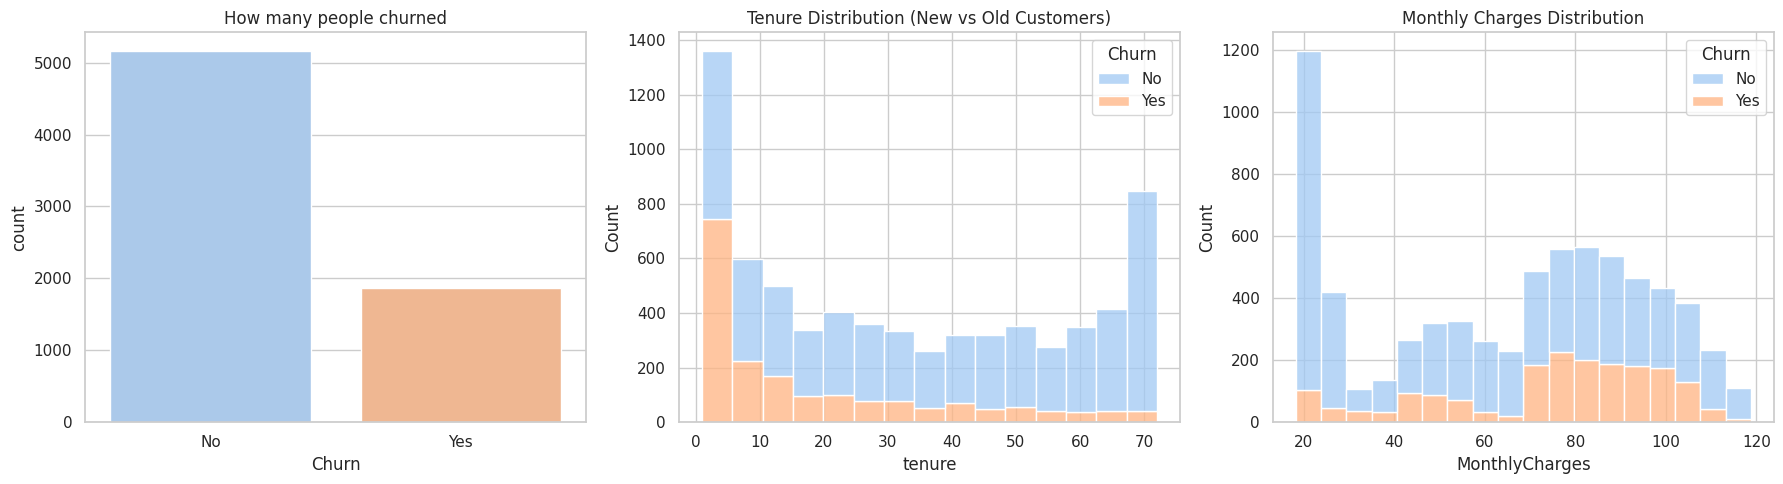

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# figure with 3 subplots
fig, axes = plt.subplots(1,3, figsize=(18, 5))

#Overall Churn Distribution
sns.countplot(x='Churn', data=df, ax=axes[0], palette="pastel")
axes[0].set_title('How many people churned')

#Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', ax=axes[1], palette="pastel" )
axes[1].set_title('Tenure Distribution (New vs Old Customers)')

#Monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', ax=axes[2], palette="pastel")
axes[2].set_title('Monthly Charges Distribution')

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

#Converting churn to yes:1 and no:0
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

#Converting all other data to numeric values
df_encoded = pd.get_dummies(df, drop_first=True)

# Setting features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

#Spliiting data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("Data successfully split!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Data successfully split!
Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)
